<a href="https://colab.research.google.com/github/DeveshValluru/DeepLearningProjects/blob/main/SentimentAnalysisWithNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
from keras.preprocessing.text import one_hot, Tokenizer

from keras.models import Sequential
from keras.layers import Activation,Dropout,Dense,Flatten
from keras.layers import LSTM,Embedding,GlobalMaxPooling1D,Conv1D

from sklearn.model_selection import train_test_split

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle kernels output lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews -p /path/to/dest

Kernel log downloaded to /path/to/dest/sentiment-analysis-of-imdb-movie-reviews.log 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/IMDB Dataset.csv.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#importing the dataset

movies_df = pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
movies_df.shape

(50000, 2)

In [ ]:
movies_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
movies_df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
movies_df.isnull().any()

<AxesSubplot:xlabel='sentiment', ylabel='count'>

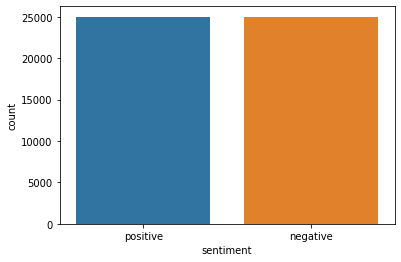

In [ ]:
import seaborn as sns
sns.countplot(x='sentiment',data=movies_df)


**DATA PREPROCESSING**

In [ ]:
movies_df['review'][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
  return TAG_RE.sub('',text)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords_list = set(stopwords.words('english'))

In [ ]:
def preprocess_text(sen):
        sen = sen.lower()
        
        # Remove html tags
        sentence = remove_tags(sen)

        # Remove punctuations and numbers
        sentence = re.sub('[^a-zA-Z]', ' ', sentence)
        
        # Single character removal
        sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

        # Remove multiple spaces
        sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.
        
        # Remove Stopwords
        pattern = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*')
        sentence = pattern.sub('', sentence)
        
        return sentence

In [ ]:
#calling preprocess function

X=[]

sentence = list(movies_df['review'])

for sen in sentence:
  X.append(preprocess_text(sen))

In [ ]:
#converting sentiment label to 0/1
y = movies_df['sentiment']
y = np.array(list(map(lambda x: 1 if x=='positive' else 0,y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)


In [ ]:
vocab_length = len(word_tokenizer.word_index) +1

vocab_length

92394

In [ ]:
from keras.utils import pad_sequences


In [ ]:
from nltk.lm.preprocessing import pad_sequence
#padding all reviews to fixed length 100

maxlen = 100

X_train = pad_sequences(X_train,padding='post',maxlen=maxlen)
X_test = pad_sequences(X_test,padding='post',maxlen=maxlen)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-02-27 13:14:42--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-02-27 13:14:42--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-02-27 13:14:42--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
!ls
!pwd

 glove.6B.100d.txt   glove.6B.50d.txt	'IMDB Dataset.csv.zip'
 glove.6B.200d.txt   glove.6B.zip	 kaggle.json
 glove.6B.300d.txt  'IMDB Dataset.csv'	 sample_data
/content


In [ ]:
from numpy.core.multiarray import zeros

embedding_dictionary = dict()
glove_file = open('glove.6B.100d.txt',encoding = 'utf-8')

for line in glove_file:
  records = line.split()
  word = records[0]
  vector_dimensions = np.asarray(records[1:],dtype='float32')
  embedding_dictionary[word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_length,100))

for word,index in word_tokenizer.word_index.items():
  embedding_vector = embedding_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(92394, 100)

MODEL TRAINING

In [ ]:
model1 = Sequential()
embedding_layer = Embedding(vocab_length,100, weights=[embedding_matrix],input_length=maxlen,trainable=False)
model1.add(embedding_layer)
model1.add(Flatten())
model1.add(Dense(1,activation='sigmoid'))

In [ ]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9239400   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 9,249,401
Trainable params: 10,001
Non-trainable params: 9,239,400
_________________________________________________________________


In [ ]:
model1_history = model1.fit(X_train,y_train,batch_size=128,epochs=6,verbose=1,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 3s 9ms/step - loss: 0.5555 - acc: 0.7146 - val_loss: 0.5014 - val_acc: 0.7613
Epoch 2/6
250/250 [==============================] - 1s 6ms/step - loss: 0.4466 - acc: 0.7984 - val_loss: 0.4966 - val_acc: 0.7654
Epoch 3/6
250/250 [==============================] - 1s 6ms/step - loss: 0.4110 - acc: 0.8171 - val_loss: 0.4990 - val_acc: 0.7666
Epoch 4/6
250/250 [==============================] - 1s 5ms/step - loss: 0.3879 - acc: 0.8312 - val_loss: 0.5104 - val_acc: 0.7629
Epoch 5/6
250/250 [==============================] - 1s 5ms/step - loss: 0.3729 - acc: 0.8375 - val_loss: 0.5184 - val_acc: 0.7620
Epoch 6/6
250/250 [==============================] - 1s 6ms/step - loss: 0.3637 - acc: 0.8411 - val_loss: 0.5352 - val_acc: 0.7560


In [ ]:
score = model1.evaluate(X_test,y_test,verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.5624 - acc: 0.7481


In [ ]:
print('Test_score', score[0])
print('Test_acc',score[1])

Test_score 0.5623589158058167
Test_acc 0.7480999827384949


In [ ]:
import matplotlib.pyplot as plt

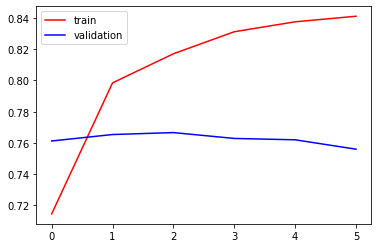

In [ ]:
plt.plot(model1_history.history['acc'],color='red',label='train')
plt.plot(model1_history.history['val_acc'],color='blue',label='validation')
plt.legend()
plt.show()

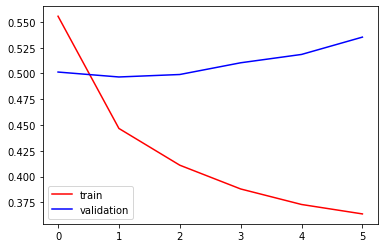

In [ ]:
plt.plot(model1_history.history['loss'],color='red',label='train')
plt.plot(model1_history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
cnn_model = Sequential()

embedding_layer = Embedding(vocab_length,100, weights=[embedding_matrix],input_length=maxlen,trainable=False)
cnn_model.add(embedding_layer)
cnn_model.add(Conv1D(128,5,activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Flatten())
cnn_model.add(Dense(1,activation='sigmoid'))

In [ ]:
cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,303,657
Trainable params: 64,257
Non-trainable params: 9,239,400
_______________________________________

In [ ]:
cnn_model_history = cnn_model.fit(X_train,y_train,batch_size=128,epochs=6,verbose=1,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 48s 186ms/step - loss: 0.4701 - acc: 0.7740 - val_loss: 0.3762 - val_acc: 0.8363
Epoch 2/6
250/250 [==============================] - 30s 121ms/step - loss: 0.3425 - acc: 0.8532 - val_loss: 0.3535 - val_acc: 0.8471
Epoch 3/6
250/250 [==============================] - 42s 167ms/step - loss: 0.2846 - acc: 0.8866 - val_loss: 0.3343 - val_acc: 0.8525
Epoch 4/6
250/250 [==============================] - 35s 140ms/step - loss: 0.2404 - acc: 0.9108 - val_loss: 0.3335 - val_acc: 0.8569
Epoch 5/6
250/250 [==============================] - 47s 186ms/step - loss: 0.1994 - acc: 0.9324 - val_loss: 0.3333 - val_acc: 0.8560
Epoch 6/6
250/250 [==============================] - 45s 180ms/step - loss: 0.1653 - acc: 0.9495 - val_loss: 0.3541 - val_acc: 0.8506


In [ ]:
score = cnn_model.evaluate(X_test,y_test,verbose=1)

313/313 [==============================] - 6s 18ms/step - loss: 0.3541 - acc: 0.8473


In [ ]:
print('Test_score', score[0])
print('Test_acc',score[1])

Test_score 0.35406216979026794
Test_acc 0.8472999930381775


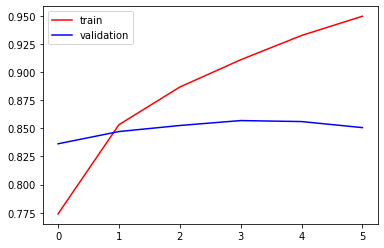

In [ ]:
plt.plot(cnn_model_history.history['acc'],color='red',label='train')
plt.plot(cnn_model_history.history['val_acc'],color='blue',label='validation')
plt.legend()
plt.show()

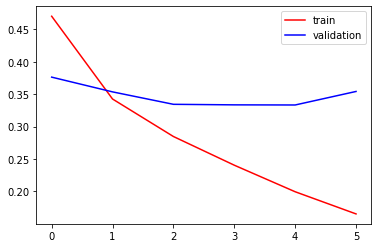

In [ ]:
plt.plot(cnn_model_history.history['loss'],color='red',label='train')
plt.plot(cnn_model_history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length,100, weights=[embedding_matrix],input_length=maxlen,trainable=False)
lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))
lstm_model.add(Dense(1,activation='sigmoid'))


In [ ]:
lstm_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,356,777
Trainable params: 117,377
Non-trainable params: 9,239,400
_________________________________________________________________


In [ ]:
lstm_model_history = lstm_model.fit(X_train,y_train,batch_size=128,epochs=6,verbose=1,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 128s 501ms/step - loss: 0.5246 - acc: 0.7382 - val_loss: 0.4404 - val_acc: 0.7980
Epoch 2/6
250/250 [==============================] - 92s 368ms/step - loss: 0.4202 - acc: 0.8132 - val_loss: 0.3888 - val_acc: 0.8346
Epoch 3/6
250/250 [==============================] - 91s 365ms/step - loss: 0.3639 - acc: 0.8419 - val_loss: 0.3521 - val_acc: 0.8533
Epoch 4/6
250/250 [==============================] - 91s 364ms/step - loss: 0.3428 - acc: 0.8537 - val_loss: 0.3205 - val_acc: 0.8631
Epoch 5/6
250/250 [==============================] - 91s 363ms/step - loss: 0.3153 - acc: 0.8673 - val_loss: 0.3265 - val_acc: 0.8587
Epoch 6/6
250/250 [==============================] - 93s 370ms/step - loss: 0.2992 - acc: 0.8765 - val_loss: 0.3147 - val_acc: 0.8679


In [ ]:
score = lstm_model.evaluate(X_test,y_test,verbose=1)

313/313 [==============================] - 32s 103ms/step - loss: 0.3174 - acc: 0.8648


In [ ]:
print('Test_score', score[0])
print('Test_acc',score[1])

Test_score 0.3174254298210144
Test_acc 0.864799976348877


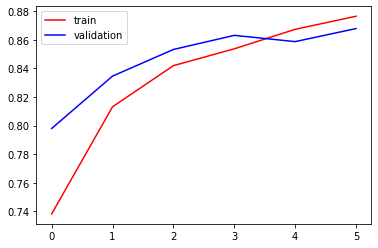

In [ ]:
plt.plot(lstm_model_history.history['acc'],color='red',label='train')
plt.plot(lstm_model_history.history['val_acc'],color='blue',label='validation')
plt.legend()
plt.show()

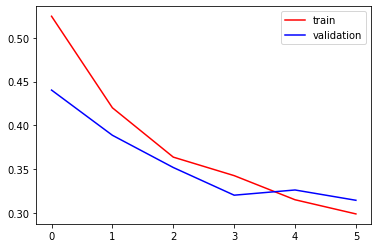

In [ ]:
plt.plot(lstm_model_history.history['loss'],color='red',label='train')
plt.plot(lstm_model_history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()